#### 订单表的长度
#### 统计菜品的平均价格
#### 最受欢迎的菜
#### 哪个订单ID点的菜最多
#### 哪个时间段热门
#### ...

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' # 中文显示问题
%matplotlib inline
# 加载数据
data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name = 'meal_order_detail3')
# 数据预处理
## 合并数据
data = pd.concat([data1,data2,data3],axis = 0) #行连接
data.head()

data.dropna(axis =1,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [9]:
# 菜品的平均价格
round(data['amounts'].mean(),2)

44.82

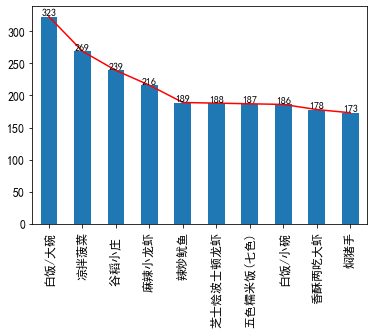

In [26]:
# 最受欢迎的菜品
dishes_count = data['dishes_name'].value_counts()[:10]
dishes_count
# 可视化
dishes_count.plot(kind = 'line',color = 'r')
dishes_count.plot(kind = 'bar',fontsize = 12)
for x,y in enumerate(dishes_count):
    plt.text(x,y+2,y,ha='center')

Text(0, 0.5, '点菜种类')

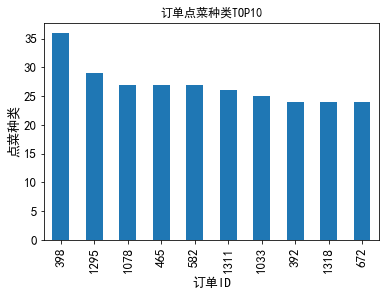

In [36]:
# 订单点菜的种类统计
data_group = data['order_id'].value_counts().head(10)
data_group.plot(kind = 'bar',fontsize = 13)
plt.title('订单点菜种类TOP10')
plt.xlabel('订单ID',fontsize = 13)
plt.ylabel('点菜种类',fontsize = 13)


<AxesSubplot:xlabel='order_id'>

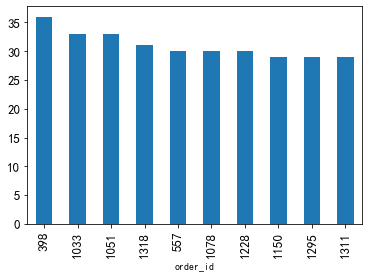

In [46]:
# 订单ID点菜数量
data['total_prize'] = data['counts']*data['amounts']
data['total_prize']
dataGroup = data[['order_id','counts','amounts','total_prize']].groupby('order_id')
Group_sum = dataGroup.sum()
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=13)


Text(0.5, 1.0, '消费金额前10')

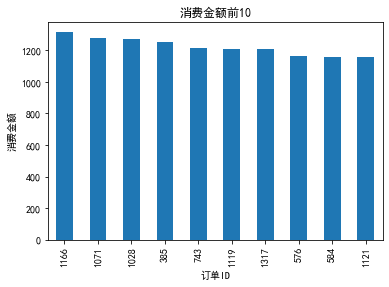

In [51]:
sort_total_prize = Group_sum.sort_values(by='total_prize',ascending = False)
sort_total_prize['total_prize'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')

<AxesSubplot:xlabel='hour'>

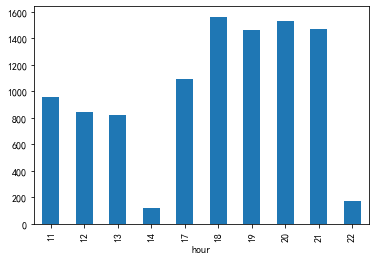

In [52]:
# 点菜的集中时间
data['hourcount'] = 1
data['time'] =pd.to_datetime(data['place_order_time'])
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour = data.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('下单数量')
plt.title('下单数与小时的关系图')

Text(0.5, 1.0, '点菜数量与日期的关系图')

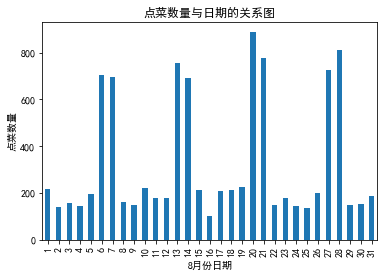

In [56]:
# 哪一天订餐数量最多
data['daycount'] = 1
data['day'] = data['time'].map(lambda x:x.day)
gp_by_day = data.groupby(by = 'day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')

Text(0.5, 1.0, '点菜数量与日期的关系图')

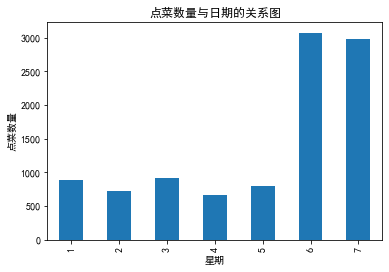

In [59]:
# 查看星期几人数最多，订餐数最多，映射数据到星期
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday()+1)
gp_by_weekday = data.groupby(by = 'weekday').count()['weekcount']
gp_by_weekday.plot(kind = 'bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')